In [79]:
#importing all necessary libararies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)


In [2]:
#to avoid warnings
import warnings 
warnings.filterwarnings("ignore")

**Reading and understanding the dataset**

In [3]:
#reading and importing the dataset
app_data = pd.read_csv("application_data.csv")

In [4]:
#understanding the dataset
app_data.shape

(307511, 122)

In [5]:
#checking information of the dataset
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#checking the rows and columns present in the dataset
app_data.info("all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#checking the null values in each column
app_data.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

**Percent Missing values present in columns sorted** 

In [9]:
train_missing = app_data.count()/len(app_data)
train_missing = (1-train_missing)*100
train_missing.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

as we can see the missing values are in mean, median, mode.


we are creating a separate varaibale train_data for analysis

In [10]:
train_data = app_data.loc[:, train_missing<50]

In [11]:
train_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


__Missing value treatment__

As we can see in the dataset there are many missing values , these missing values can cause an error in further data analysis.
we need to replace such missing values depends on column types.

The columns are:
    
OCCUPATION_TYPE                 31.345545

EXT_SOURCE_3                    19.825307

AMT_REQ_CREDIT_BUREAU_QRT       13.501631

AMT_REQ_CREDIT_BUREAU_YEAR      13.501631

AMT_REQ_CREDIT_BUREAU_WEEK      13.501631

AMT_REQ_CREDIT_BUREAU_MON       13.501631

AMT_REQ_CREDIT_BUREAU_DAY       13.501631

AMT_REQ_CREDIT_BUREAU_HOUR      13.501631





column:Occupation_Type

In [12]:
train_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

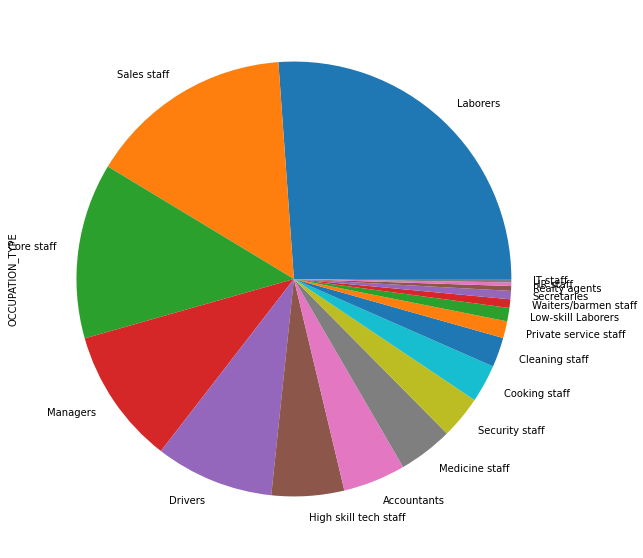

In [13]:
train_data["OCCUPATION_TYPE"].value_counts().plot.pie(figsize=(20,10))
plt.show()

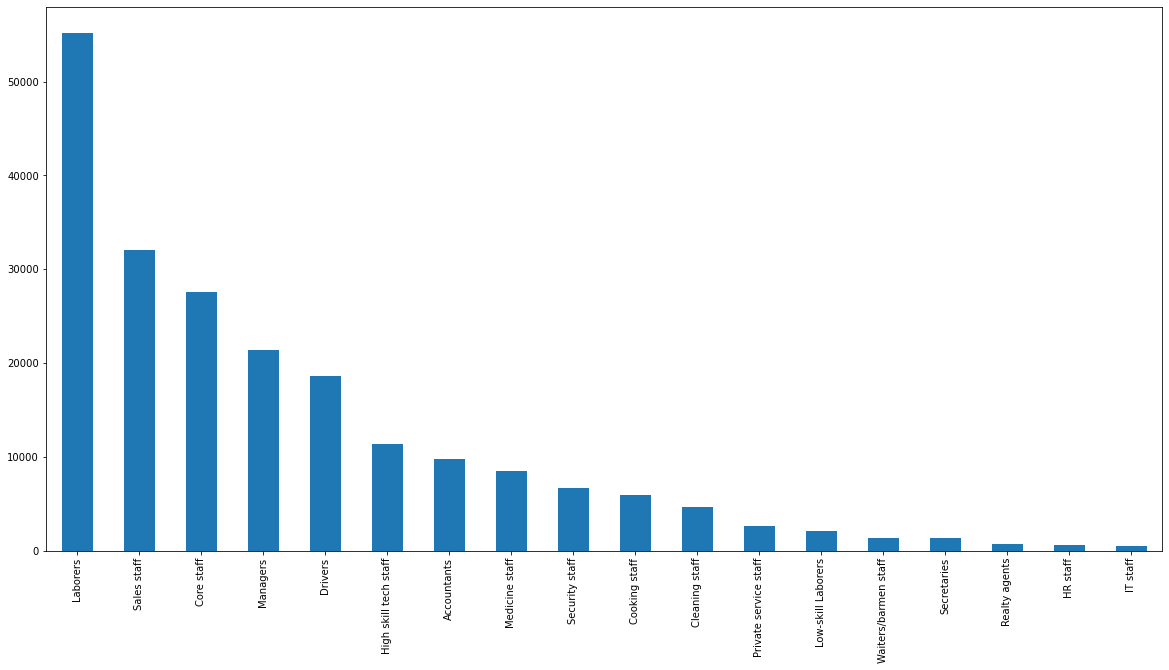

In [14]:
train_data["OCCUPATION_TYPE"].value_counts().plot.bar(figsize=(20,10))
plt.show()

**column:EXT_SOURCE_3**

In [15]:
app_data["EXT_SOURCE_3"].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [16]:
app_data["EXT_SOURCE_3"].isnull().sum()

60965

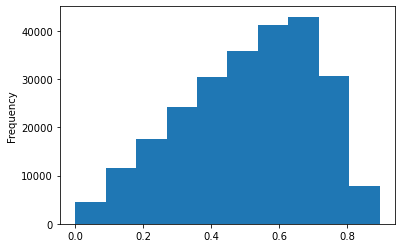

In [17]:
app_data['EXT_SOURCE_3'].plot.hist()
plt.show()

In [18]:
app_data['EXT_SOURCE_3'].mean()

0.5108529061800121

In [19]:
app_data['EXT_SOURCE_3'].mode()

0    0.7463
dtype: float64

__column:AMT_REQ_CREDIT_BUREAU_QRT__

In [20]:
train_data['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

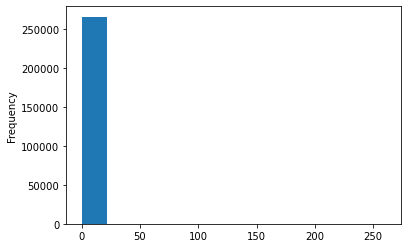

In [21]:
unique_values =  len(train_data.AMT_REQ_CREDIT_BUREAU_QRT.unique())
train_data['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins = unique_values)
plt.show()

In [22]:
app_data["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [23]:
app_data["AMT_REQ_CREDIT_BUREAU_QRT"].mode()

0    0.0
dtype: float64

__column:AMT_REQ_CREDIT_BUREAU_YEAR__

In [24]:
train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].head(10)

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
5    1.0
6    2.0
7    0.0
8    1.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<AxesSubplot:ylabel='Frequency'>

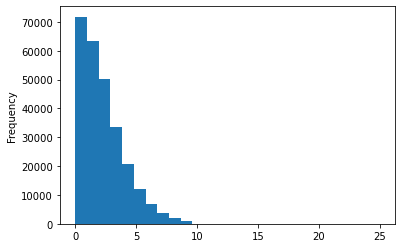

In [25]:
unique_values =  len(train_data.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins = unique_values)

In [26]:
train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [27]:
train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
dtype: float64

__column:AMT_REQ_CREDIT_BUREAU_WEEK__

In [28]:
train_data['AMT_REQ_CREDIT_BUREAU_WEEK'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<AxesSubplot:ylabel='Frequency'>

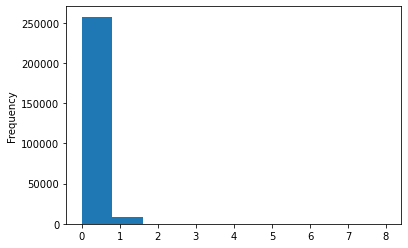

In [29]:
unique_values =  len(train_data.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
train_data['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins = unique_values)

__column:AMT_REQ_CREDIT_BUREAU_MON__

In [30]:
train_data['AMT_REQ_CREDIT_BUREAU_MON'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<AxesSubplot:ylabel='Frequency'>

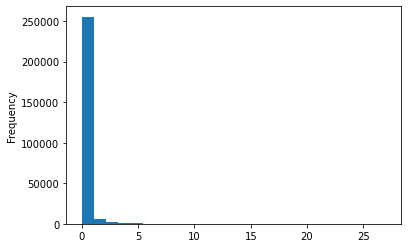

In [31]:
unique_values =  len(train_data.AMT_REQ_CREDIT_BUREAU_MON.unique())
train_data['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins = unique_values)

__column:AMT_REQ_CREDIT_BUREAU_DAY__

In [33]:
train_data['AMT_REQ_CREDIT_BUREAU_DAY'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<AxesSubplot:ylabel='Frequency'>

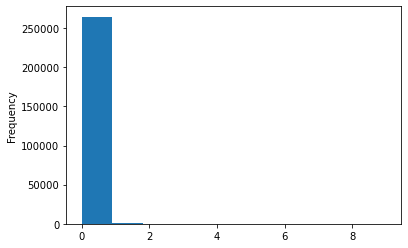

In [34]:
unique_values =  len(train_data.AMT_REQ_CREDIT_BUREAU_DAY.unique())
train_data['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins = unique_values)

In [35]:
train_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

__column:AMT_REQ_CREDIT_BUREAU_HOUR__

In [37]:
train_data['AMT_REQ_CREDIT_BUREAU_HOUR'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<AxesSubplot:ylabel='Frequency'>

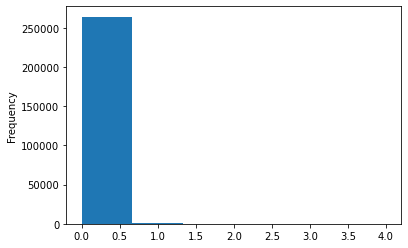

In [38]:
unique_values =  len(train_data.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
train_data['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins = unique_values)

In [39]:
train_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

we will replace null values by mode value and not mean value because mean value will give an decimal value.

In [41]:
train_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG',

**column:DAYS_BIRTH**

the columns have the  given the data of customer in days format.
we will convert it into year form and even these days are negative some  will convert it into positive by round()function

In [42]:
train_data["DAYS_BIRTH"].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [45]:
train_data["DAYS_BIRTH"]= -round(train_data["DAYS_BIRTH"]/365,0)
train_data["DAYS_BIRTH"].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [46]:
train_data["DAYS_EMPLOYED"]= -round(train_data["DAYS_EMPLOYED"]/365,0)
train_data["DAYS_EMPLOYED"].head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: DAYS_EMPLOYED, dtype: float64

In [47]:
train_data["DAYS_REGISTRATION"]= -round(train_data["DAYS_REGISTRATION"]/365,0)
train_data["DAYS_REGISTRATION"].head()

0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [48]:
train_data["DAYS_ID_PUBLISH"]= -round(train_data["DAYS_ID_PUBLISH"]/365,0)
train_data["DAYS_ID_PUBLISH"].head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

**Target column**

**Total users**

In [52]:
train_data["TARGET"].count()

307511

**Customers with payment difficulties**

In [53]:
(train_data["TARGET"]==1).sum()

24825

**Other customers**

In [54]:
(train_data["TARGET"]==0).sum()

282686

**Ratio**

In [56]:
(train_data["TARGET"]==0).sum()/(train_data["TARGET"]==1).sum()

11.387150050352467

very high ratio

## Now Lets analyse numerical and categorical data. Let's start with categorical data.

**Analyse the categorical data**

Since due to data imbalance, we will separate out the tree with a target equal to 0 and tree with a target equal to 1.

And we will analyse them individually to find relation

In [61]:
train_data_0 = train_data.loc[train_data['TARGET'] == 0]
train_data_1 = train_data.loc[train_data['TARGET'] == 1]

In [62]:
def plotting(tree, tree0, tree1, column):
    
    tree = tree
    tree_0 = tree0
    tree_1 = tree1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    tree[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = tree, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((tree_0[col].value_counts())/len(tree_0))
    df['1']= ((tree_1[col].value_counts())/len(tree_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [63]:
train_data_categorical = train_data.select_dtypes(include=['object']).columns

# Univariate Analysis of the Categorical data

**Plotting the data.**

Plotting  NAME_CONTRACT_TYPE


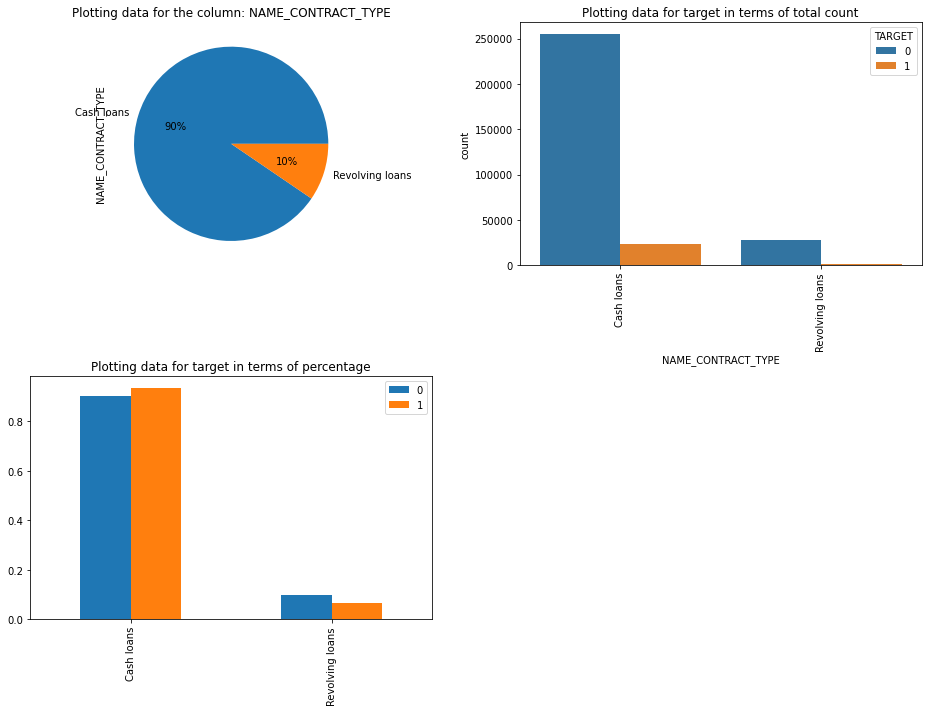

----------------------------------------------------------------------------------------------
Plotting  CODE_GENDER


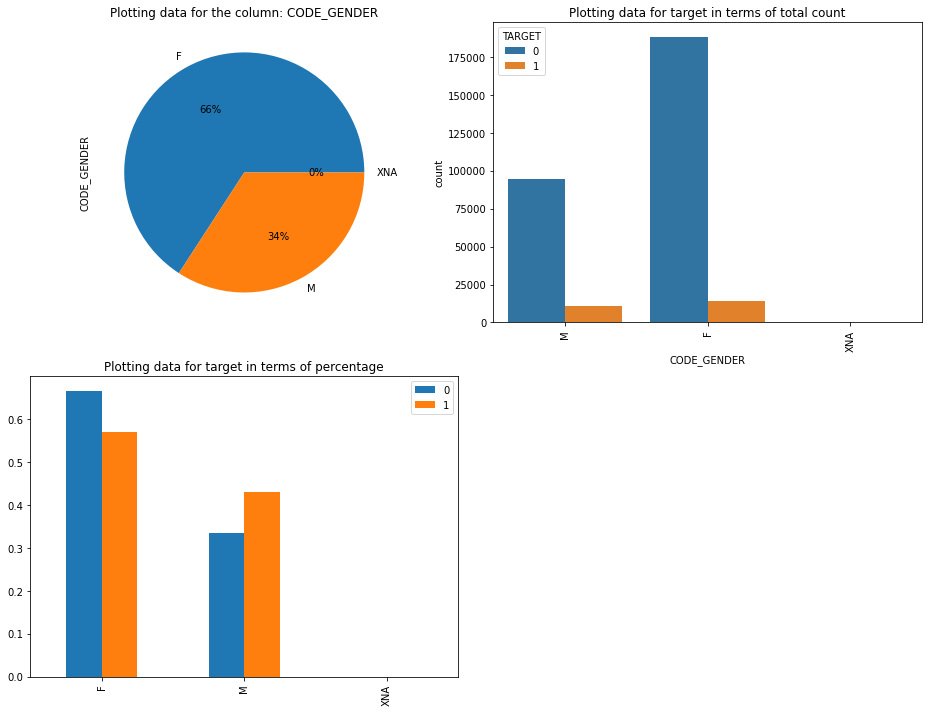

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_CAR


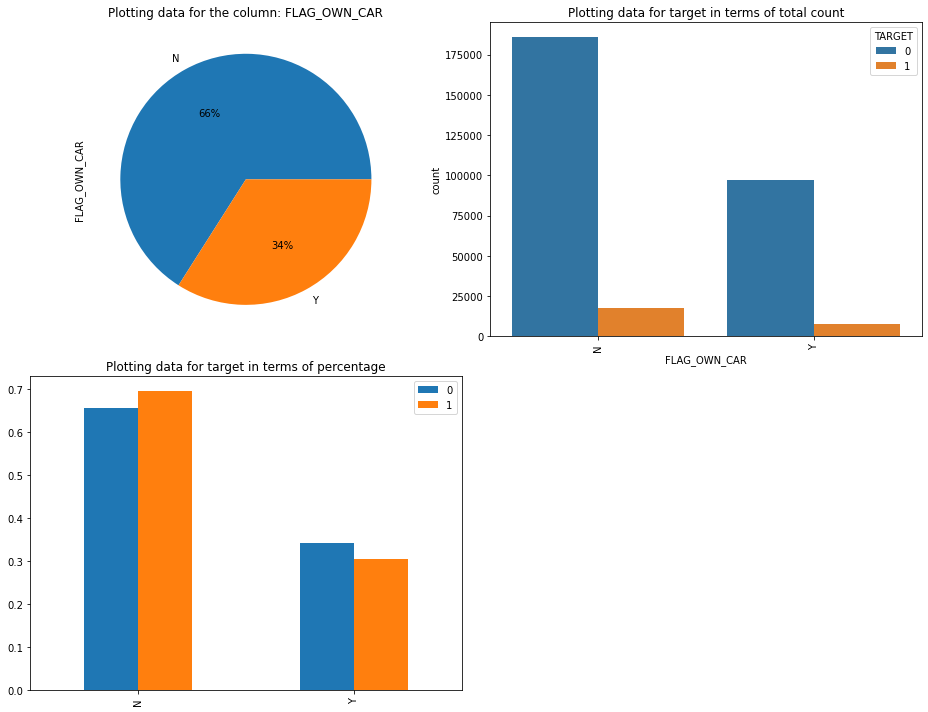

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_REALTY


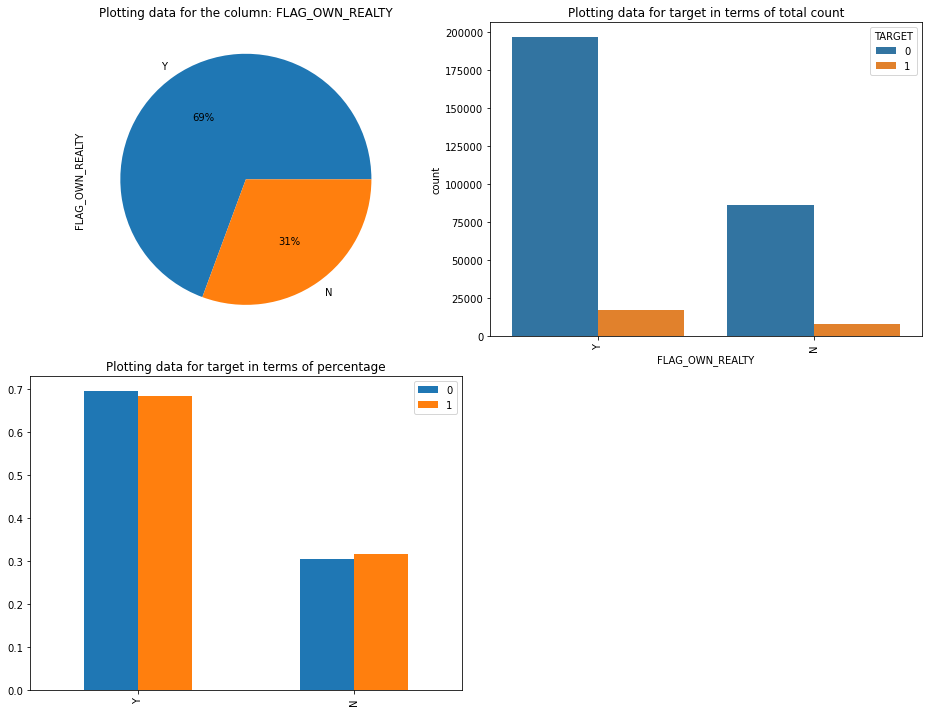

----------------------------------------------------------------------------------------------
Plotting  NAME_TYPE_SUITE


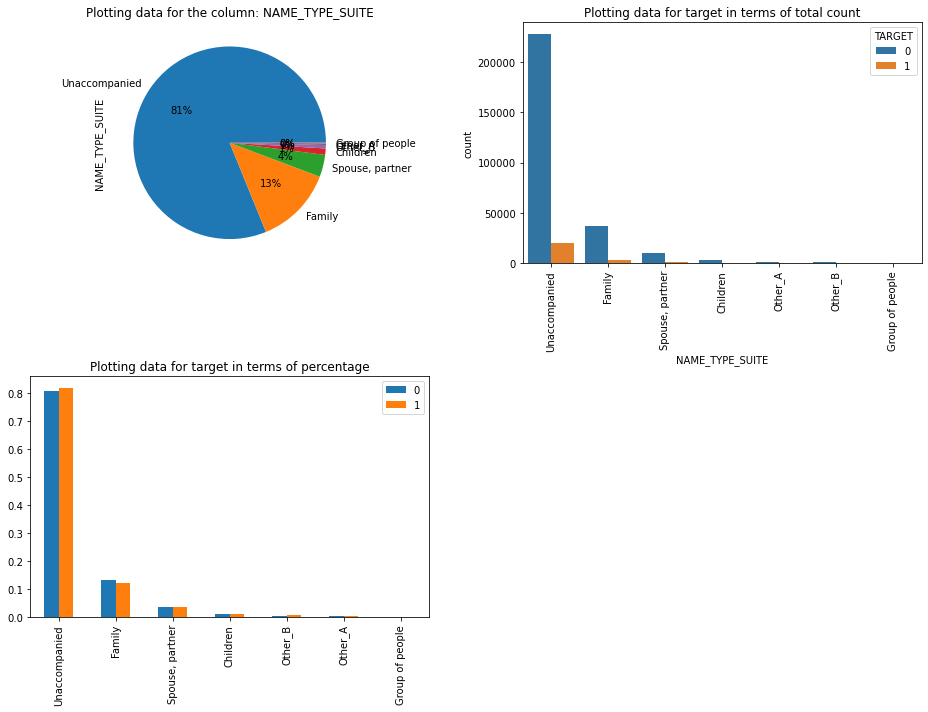

----------------------------------------------------------------------------------------------
Plotting  NAME_INCOME_TYPE


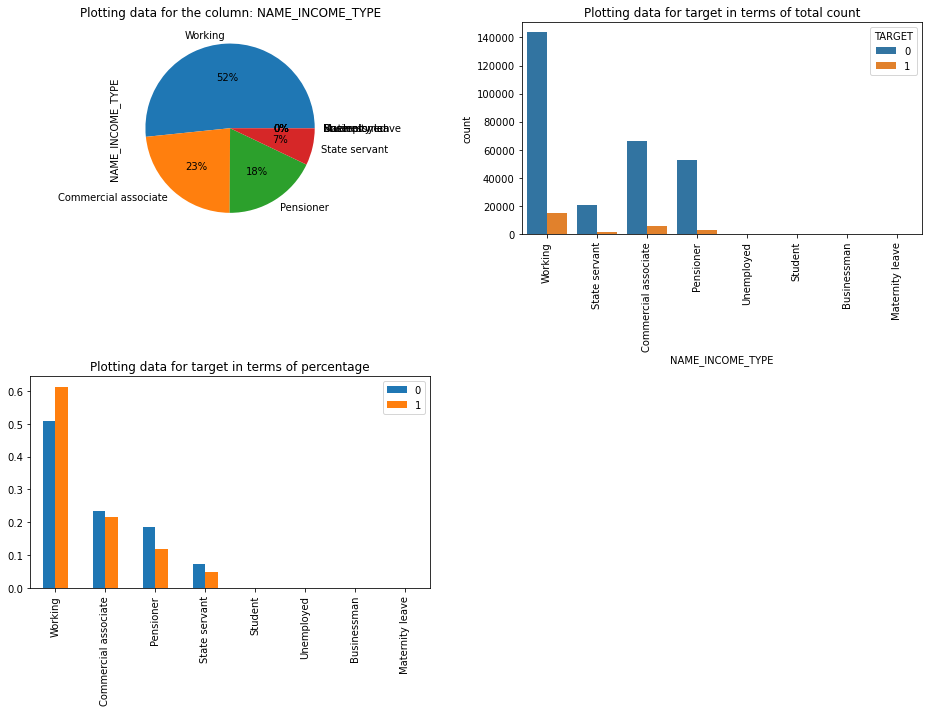

----------------------------------------------------------------------------------------------
Plotting  NAME_EDUCATION_TYPE


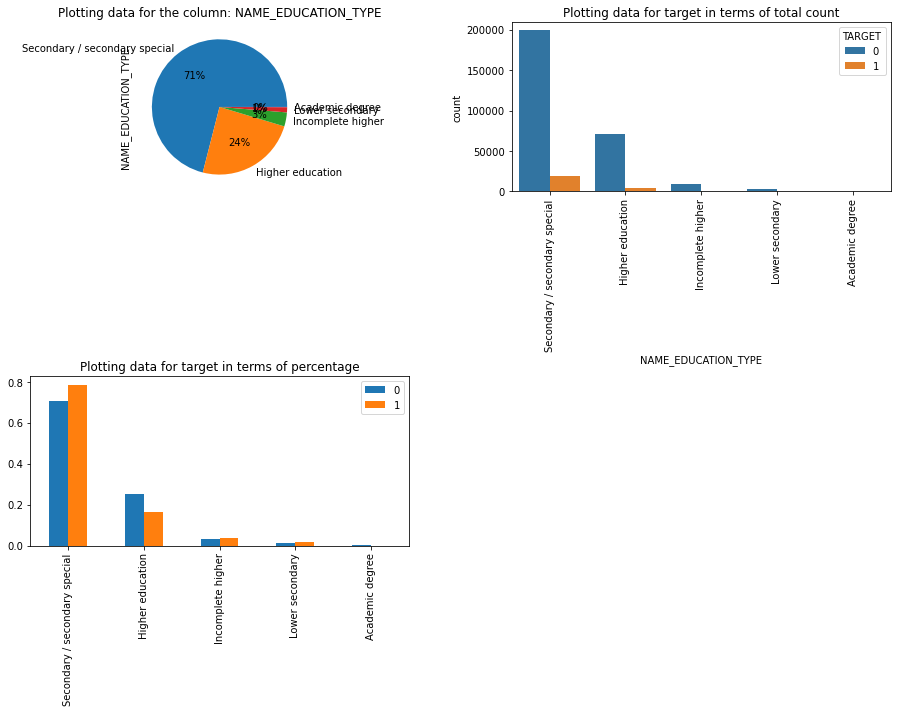

----------------------------------------------------------------------------------------------
Plotting  NAME_FAMILY_STATUS


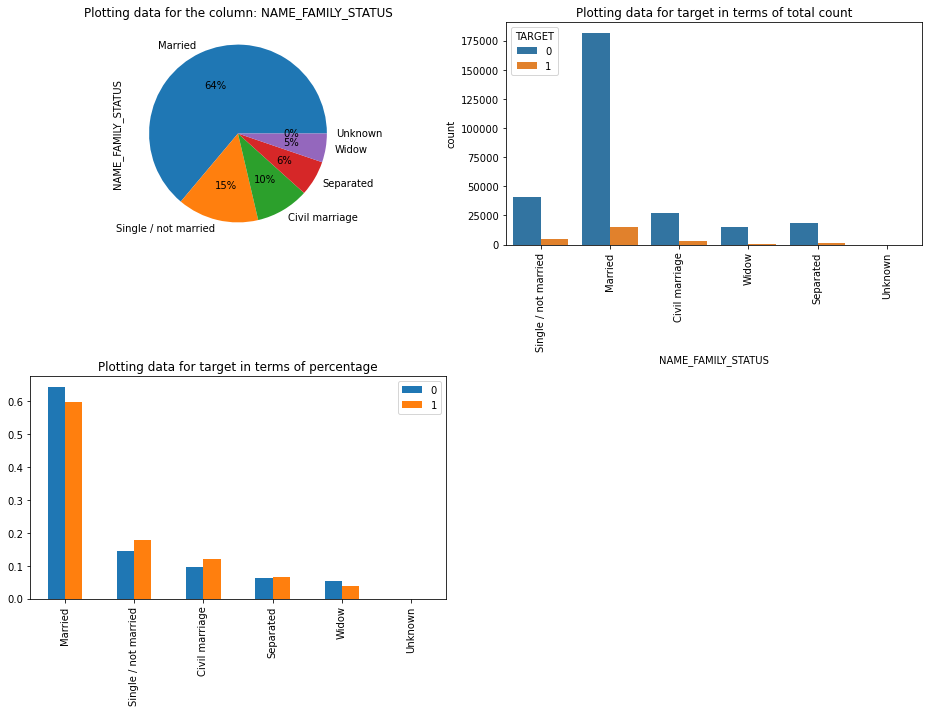

----------------------------------------------------------------------------------------------
Plotting  NAME_HOUSING_TYPE


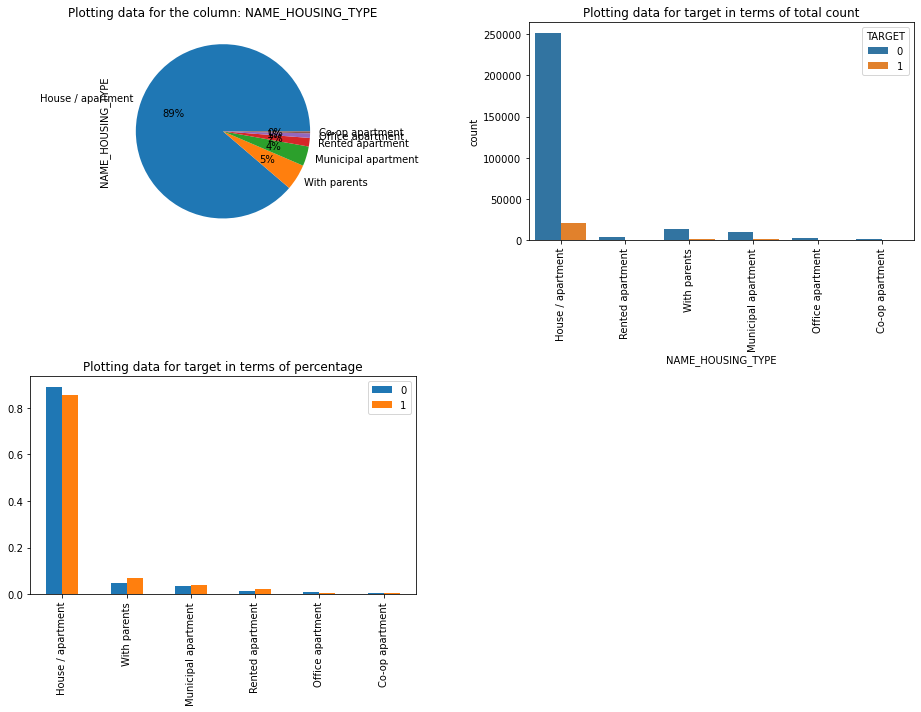

----------------------------------------------------------------------------------------------
Plotting  OCCUPATION_TYPE


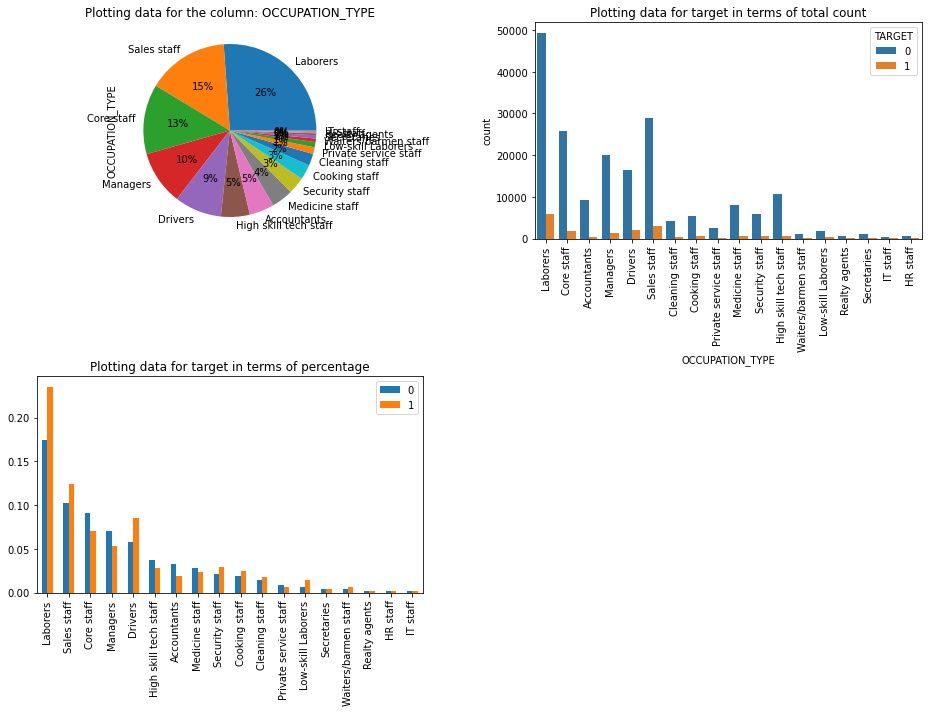

----------------------------------------------------------------------------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


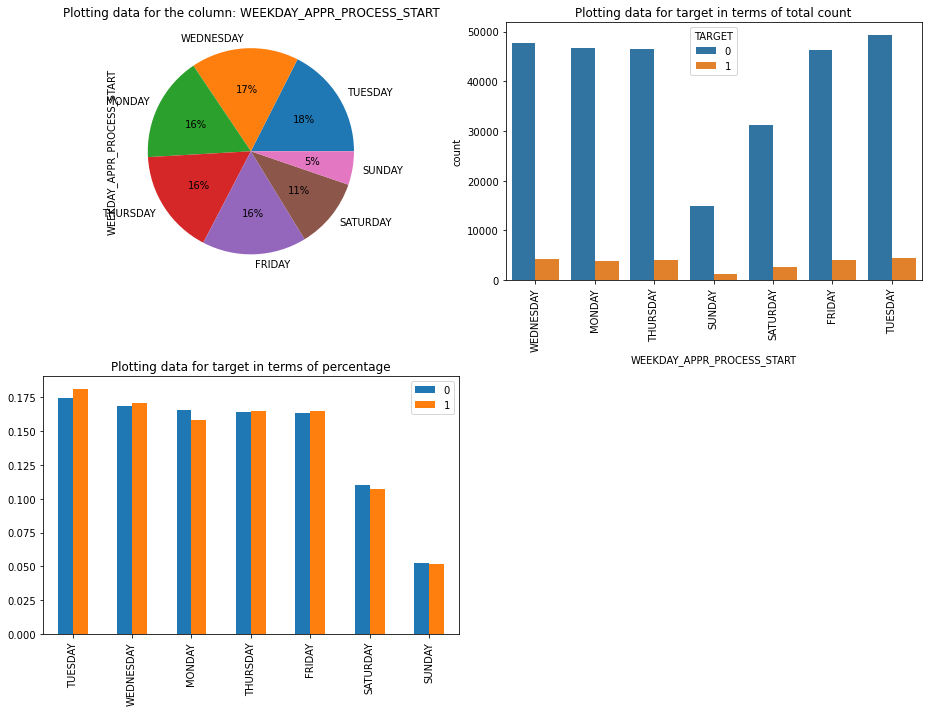

----------------------------------------------------------------------------------------------
Plotting  ORGANIZATION_TYPE


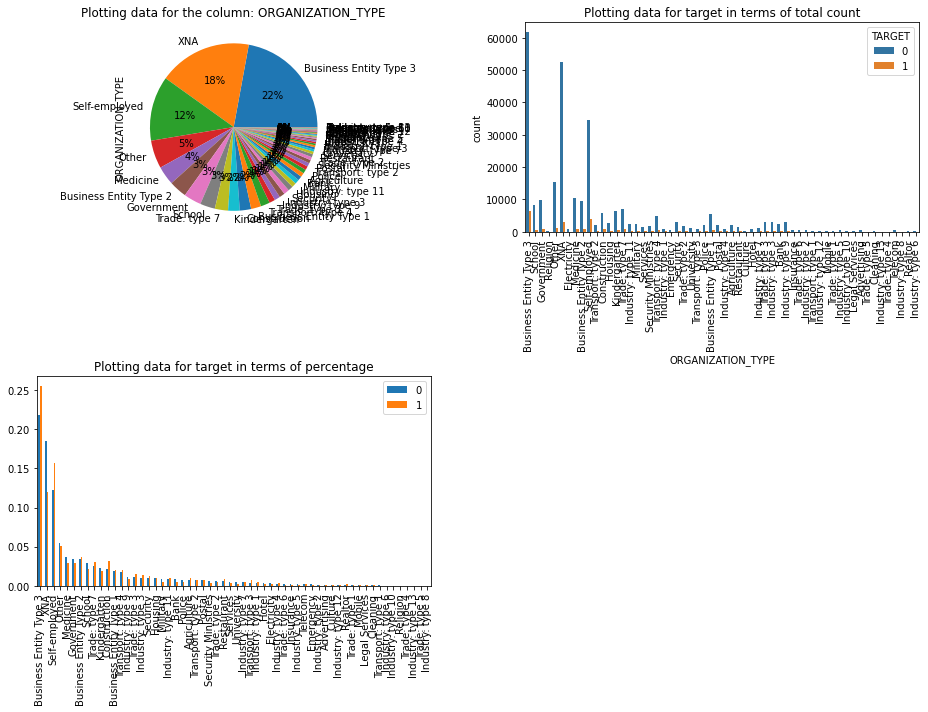

----------------------------------------------------------------------------------------------
Plotting  EMERGENCYSTATE_MODE


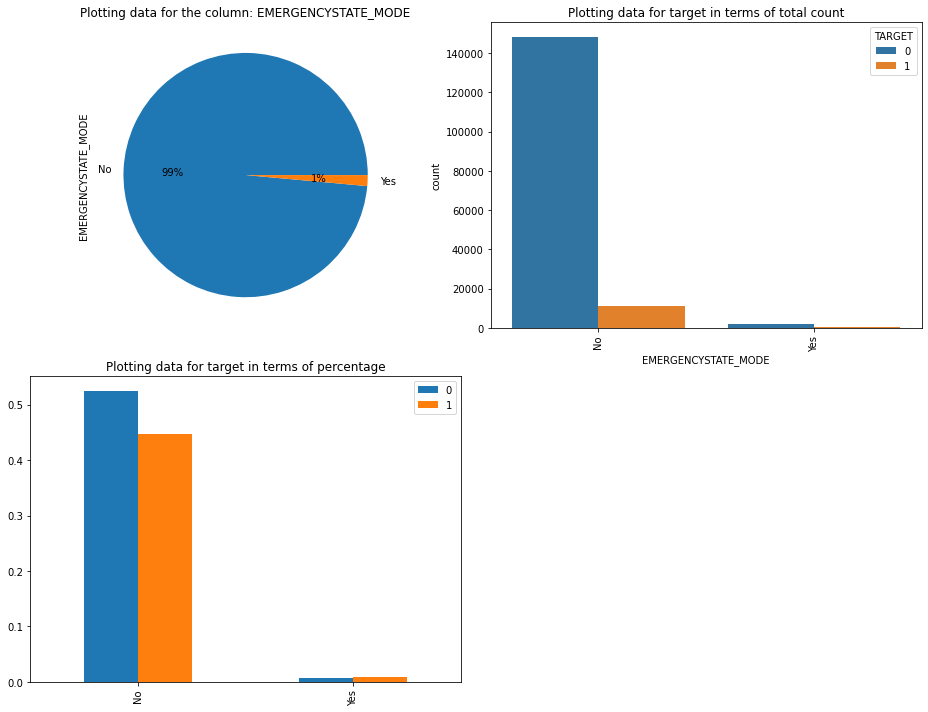

----------------------------------------------------------------------------------------------


In [66]:
for column in train_data_categorical:
    print("Plotting ", column)
    plotting(train_data, train_data_0, train_data_1, column)
    print('----------------------------------------------------------------------------------------------')

Conclusion we can get from above charts are

CODE_GENDER: Less number of males(hist plot) take loan but the defaulters are higher in case of males(dist plot).

NAME_INCOME_TYPE: Pensioner defaulter is lower than non-defaulter.

NAME_EDUCATION_TYPE: Most client take loan for secondary education followed by higher education. But the defualt rate in secondary education is much high and for higher education is much low.

NAME_FAMILY_STATUS: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage turns out to be more defaulter.

OCCUPATION_TYPE: Laborers and different categories of staffs mostly take the loan, but the managers and the high skilled tech staffs are most relaible.

# Lets study Numerical Columns 

# Non defaulter coorelation

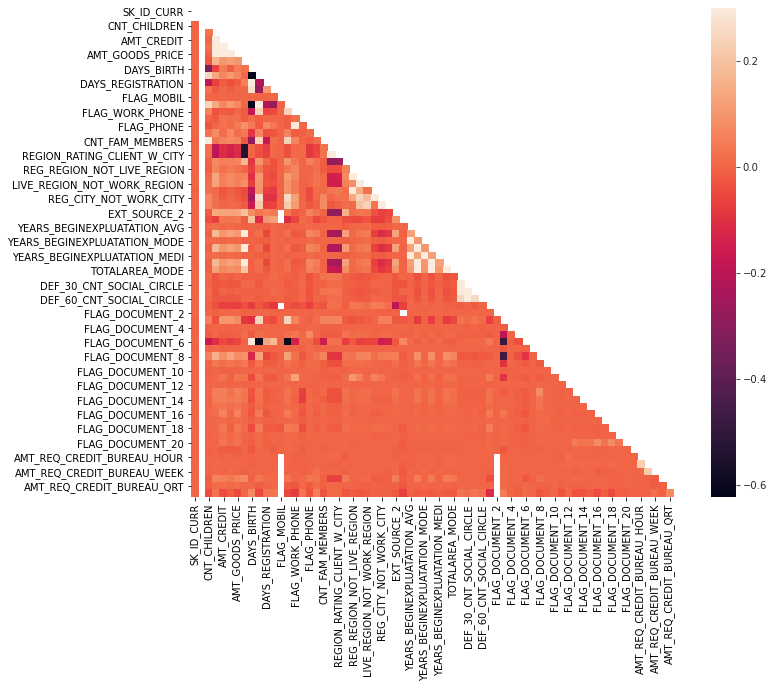

In [67]:
corr = train_data_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [69]:
correlation_0 = train_data.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]

print(correlation_0)

FLAG_MOBIL                    FLAG_DOCUMENT_12                0.000005
FLAG_DOCUMENT_12              FLAG_MOBIL                      0.000005
YEARS_BEGINEXPLUATATION_MODE  FLAG_DOCUMENT_4                 0.000005
FLAG_DOCUMENT_4               YEARS_BEGINEXPLUATATION_MODE    0.000005
YEARS_BEGINEXPLUATATION_AVG   FLAG_DOCUMENT_4                 0.000007
                                                                ...   
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997034
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998490
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998490
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999755
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999755
Length: 4524, dtype: float64


**Lets find and plot Defaulter correlation**

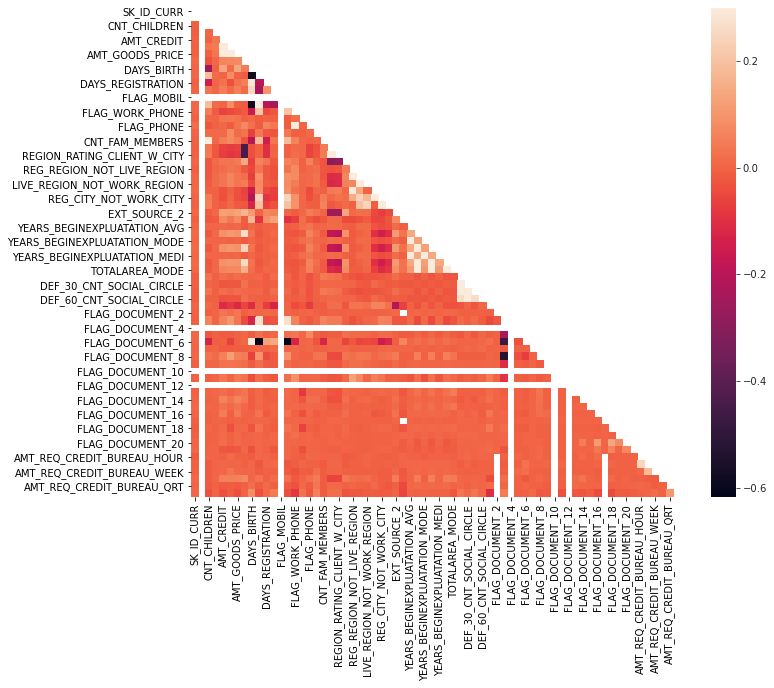

In [71]:
corr = train_data_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [72]:
correlation_1 = train_data_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind="quicksort")
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]

print(correlation_1)

REGION_RATING_CLIENT         FLAG_DOCUMENT_20               0.000010
FLAG_DOCUMENT_20             REGION_RATING_CLIENT           0.000010
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_REQ_CREDIT_BUREAU_WEEK   AMT_INCOME_TOTAL               0.000018
                                                              ...   
FLOORSMAX_AVG                FLOORSMAX_MEDI                 0.997187
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999702
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999702
Length: 3878, dtype: float64


**Analysis through Box plot**

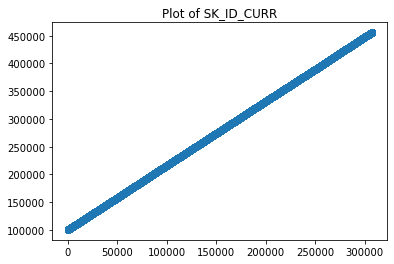

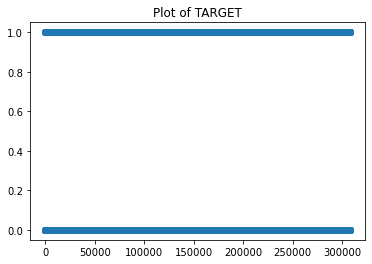

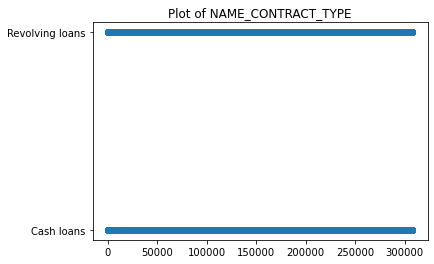

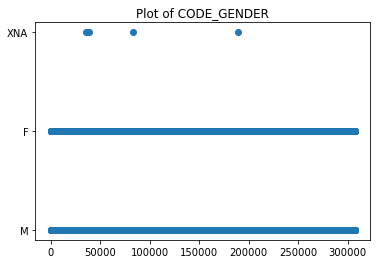

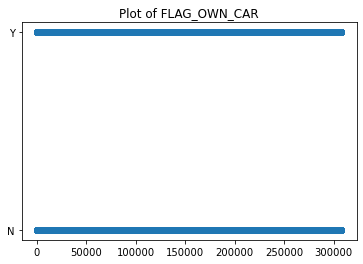

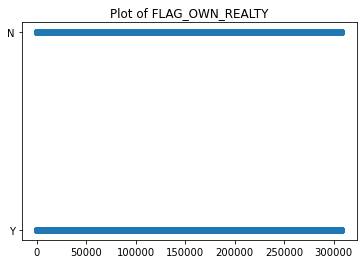

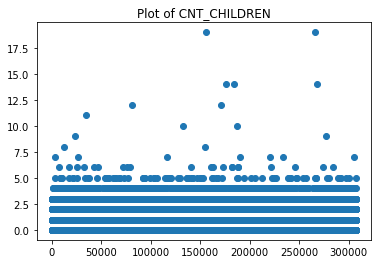

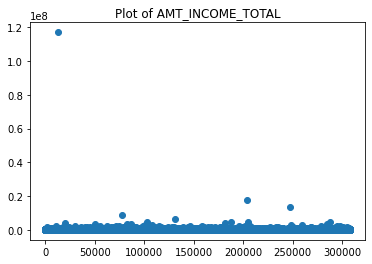

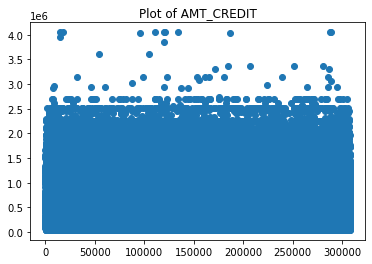

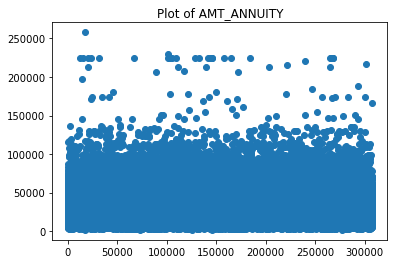

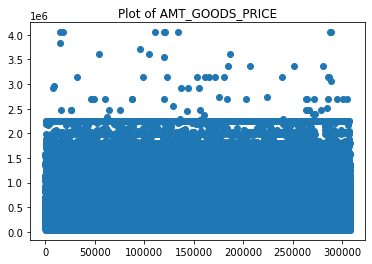

TypeError: 'value' must be an instance of str or bytes, not a float

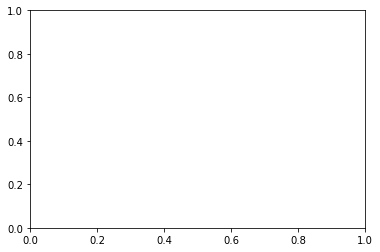

In [76]:
for column in train_data:
    title = "Plot of "+column
    plt.scatter(train_data.index, train_data[column])
    plt.title(title)
    plt.show()

# Converting a numerial data to categorical for analysis

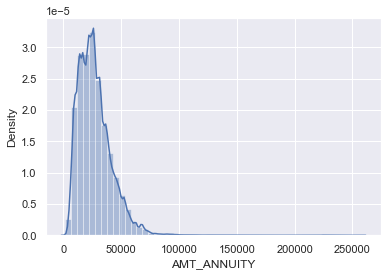

In [80]:
sns.distplot(train_data['AMT_ANNUITY'].dropna())
plt.show()

In [81]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <=50000:
        return 'medium'
    elif x > 50000 and x <=100000:
        return 'high'
    else:
        return 'very high'

train_data['amt_annuity_categorical'] = train_data['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

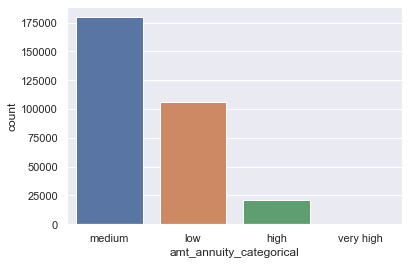

In [82]:
sns.countplot(x= 'amt_annuity_categorical', data = train_data)
plt.show()

# Univariate Analysis for numerical data

Plot of SK_ID_CURR


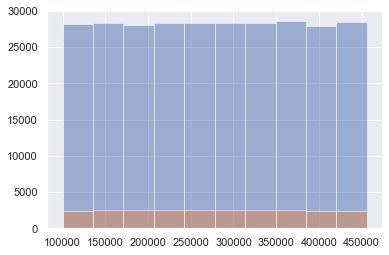

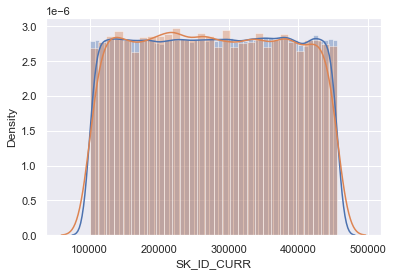

------------------------------------------------------------------------
Plot of TARGET


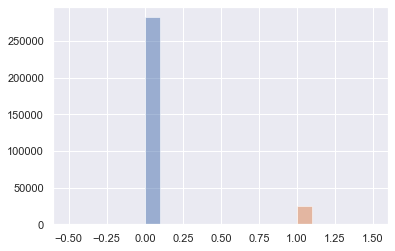

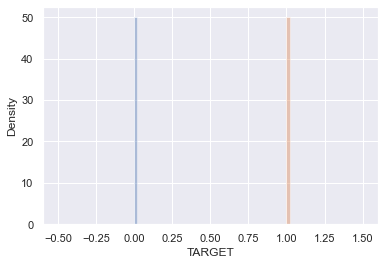

------------------------------------------------------------------------
Plot of NAME_CONTRACT_TYPE


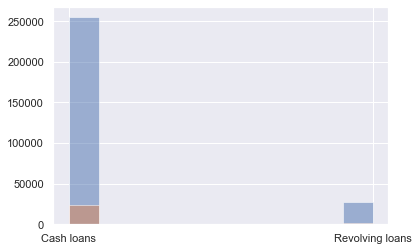

ValueError: could not convert string to float: 'Cash loans'

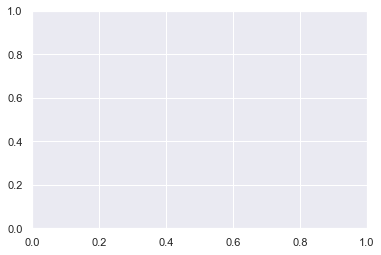

In [85]:
for column in train_data:
    title = "Plot of "+column
    print(title)
    plt.hist(train_data_0[column], alpha=0.5, label='0')
    plt.hist(train_data_1[column], alpha=0.5, label='1')
    plt.show()
    
    sns.distplot(train_data_0[column].dropna(), label='0')
    sns.distplot(train_data_1[column].dropna(),  label='1')
    
    plt.show()
    #box_plot(train_0, train_1, column)
    print("------------------------------------------------------------------------")

# Reading previous application

In [86]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
previous_application.shape

(1670214, 37)

**Lets check if there are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times**

In [88]:
# Number of unique id in previous application
previous_application.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [89]:
# Number of unique id in previous application
previous_application.SK_ID_PREV.value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

As you can see above, the shape of previous application is (1670214, 37) and length of SK_ID_PREV is also (1670214), but length of SK_ID_CURR is (338857), which is less than length of SK_ID_PREV, 
which tells us that there are duplicate number of SK_ID_PREV

# Let's merge dataframe: train and previous application based on SK_ID_PREV

In [91]:
previous_tree = train_data.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [92]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

**The merged dataframe also has multiple values for SK_ID_CURR**

In [93]:
previous_application["SK_ID_CURR"].value_counts().head(10)

187868    77
265681    73
173680    72
242412    68
206783    67
156367    66
389950    64
382179    64
198355    63
345161    62
Name: SK_ID_CURR, dtype: int64

**Segregating the dataset on Target=0 and Target=1**

In [94]:
ptree_0 = previous_tree.loc[previous_tree['TARGET'] == 0]
ptree_1 = previous_tree.loc[previous_tree['TARGET'] == 1]

In [101]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    train_data[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((train_data_0[col].value_counts())/len(train_data_0))
    df['1']= ((train_data_1[col].value_counts())/len(train_data_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptree_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptree_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

# Bivariate Analysis

**Lets plot- NAME_EDUCATION_TYPE**

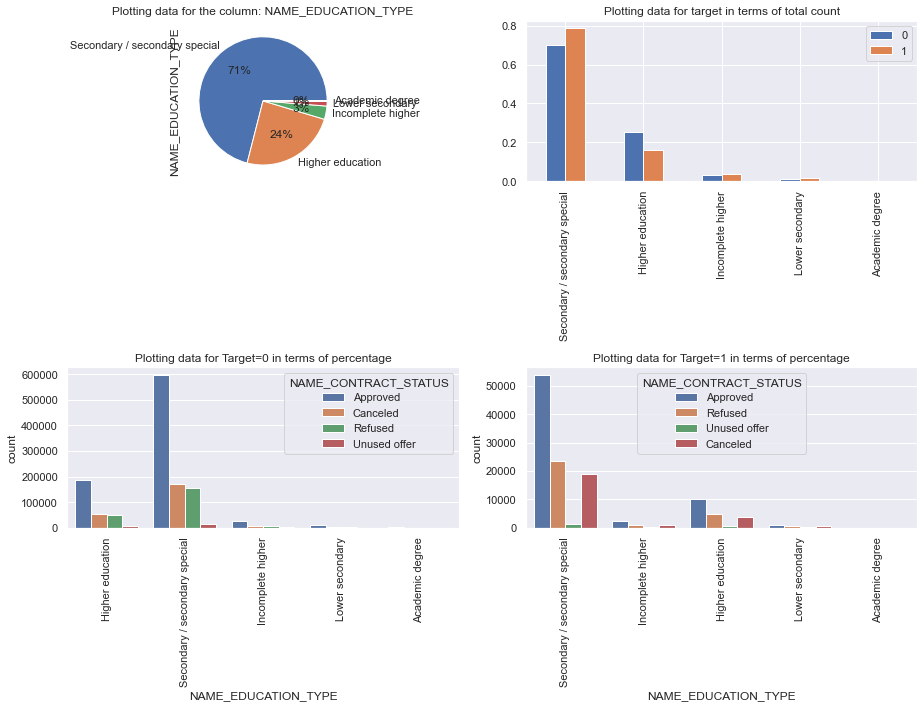

In [102]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

**NAME_FAMILY_STATUS**

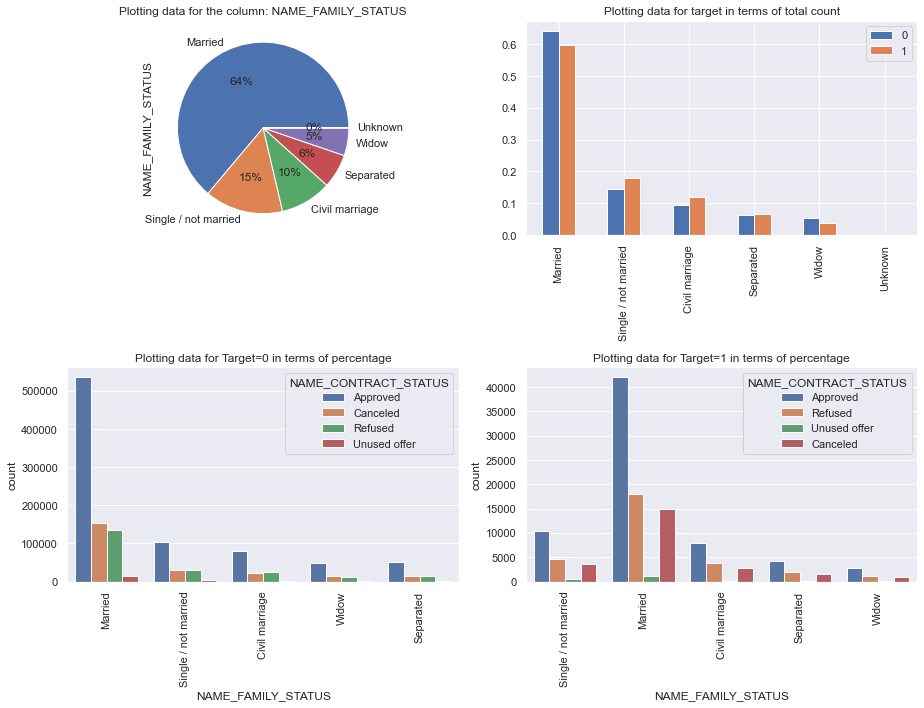

In [103]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS') 

**NAME_HOUSING_TYPE**

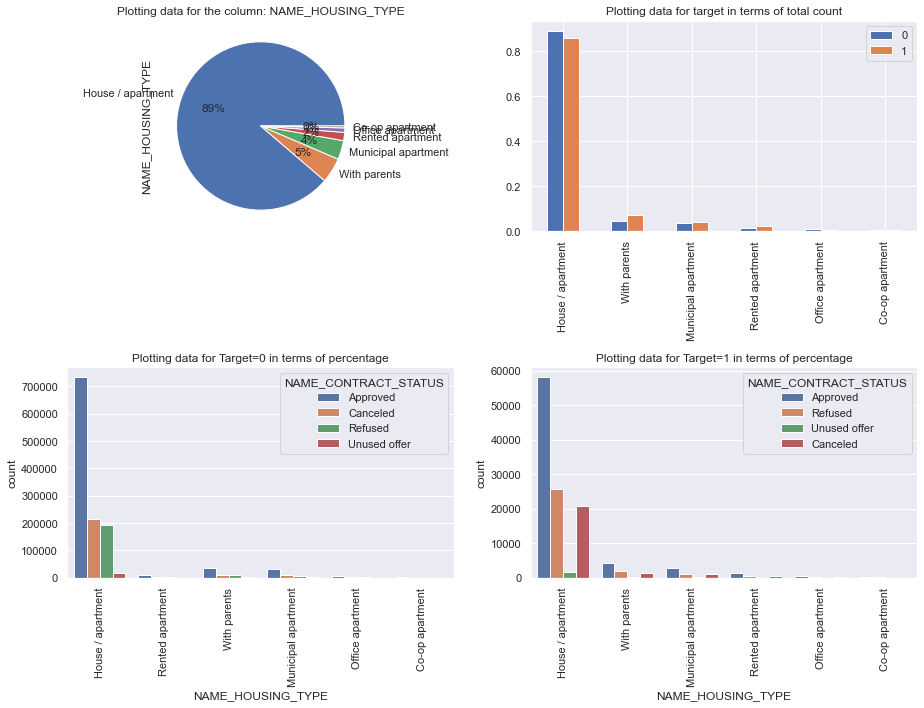

In [104]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS') 

**ORGANIZATION_TYPE**

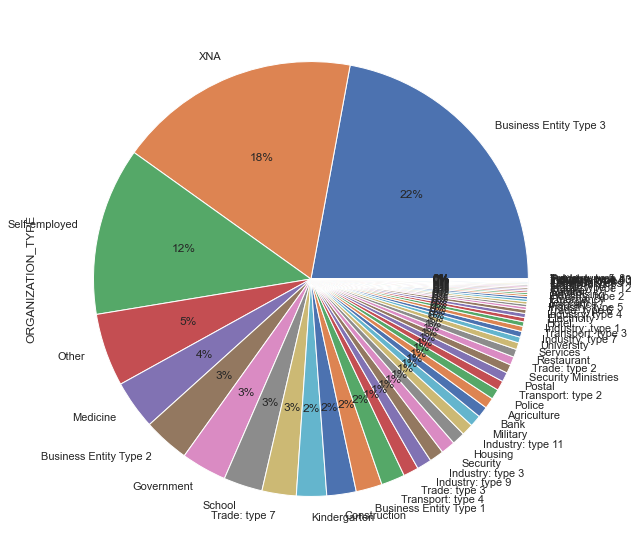

In [106]:
col = 'ORGANIZATION_TYPE'
train_data[col].value_counts().plot.pie(autopct = "%1.0f%%",figsize=(10,10))
plt.show()

<AxesSubplot:>

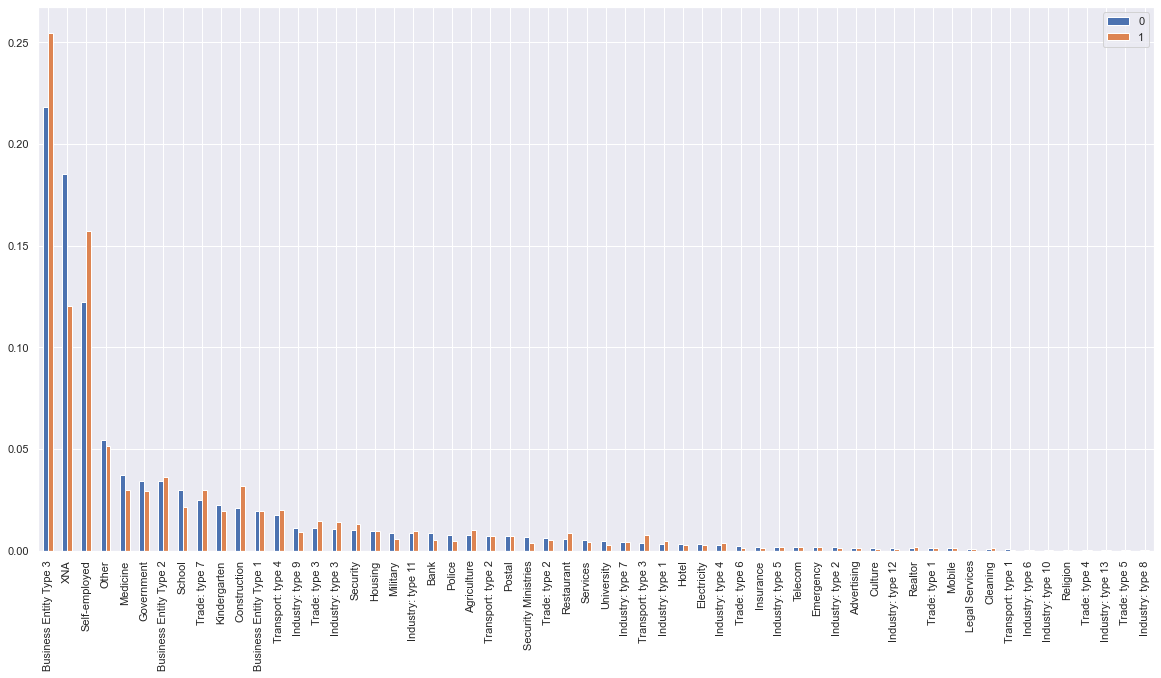

In [107]:
col = 'ORGANIZATION_TYPE'
df = pd.DataFrame()
df['0']= ((train_data_0[col].value_counts())/len(train_data_0))
df['1']= ((train_data_1[col].value_counts())/len(train_data_1))
sns.set(rc={'figure.figsize':(20,10)})
df.plot.bar()

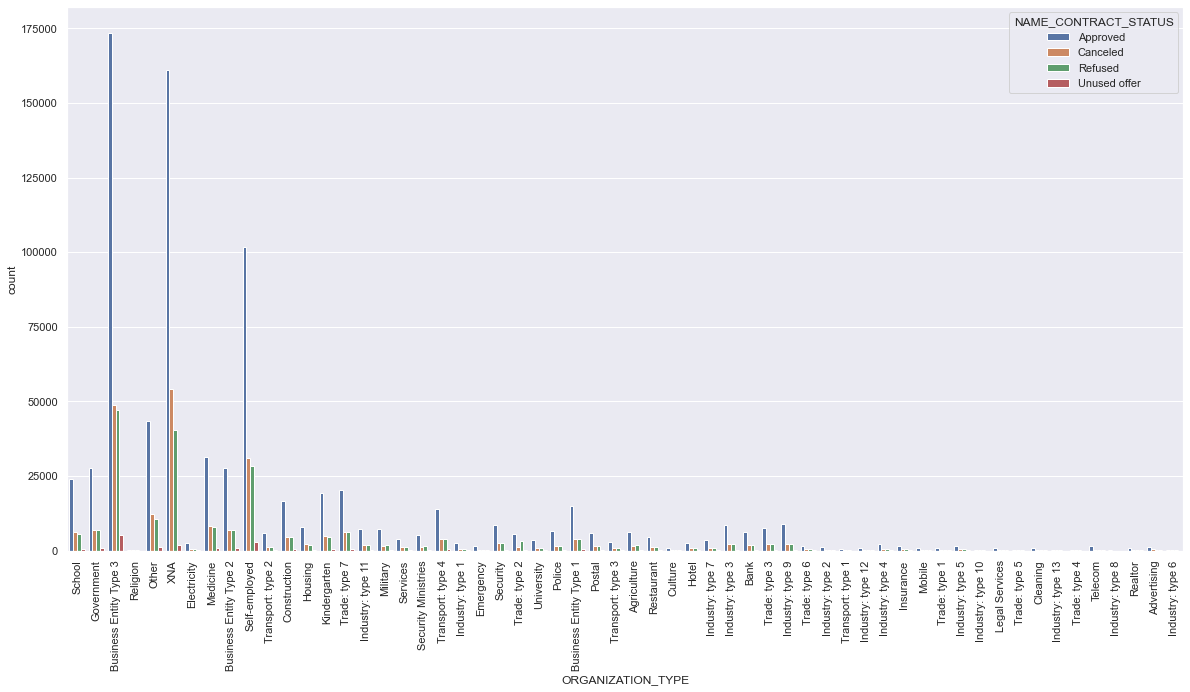

In [108]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=ptree_0)
plt.xticks(rotation=90)
plt.show()

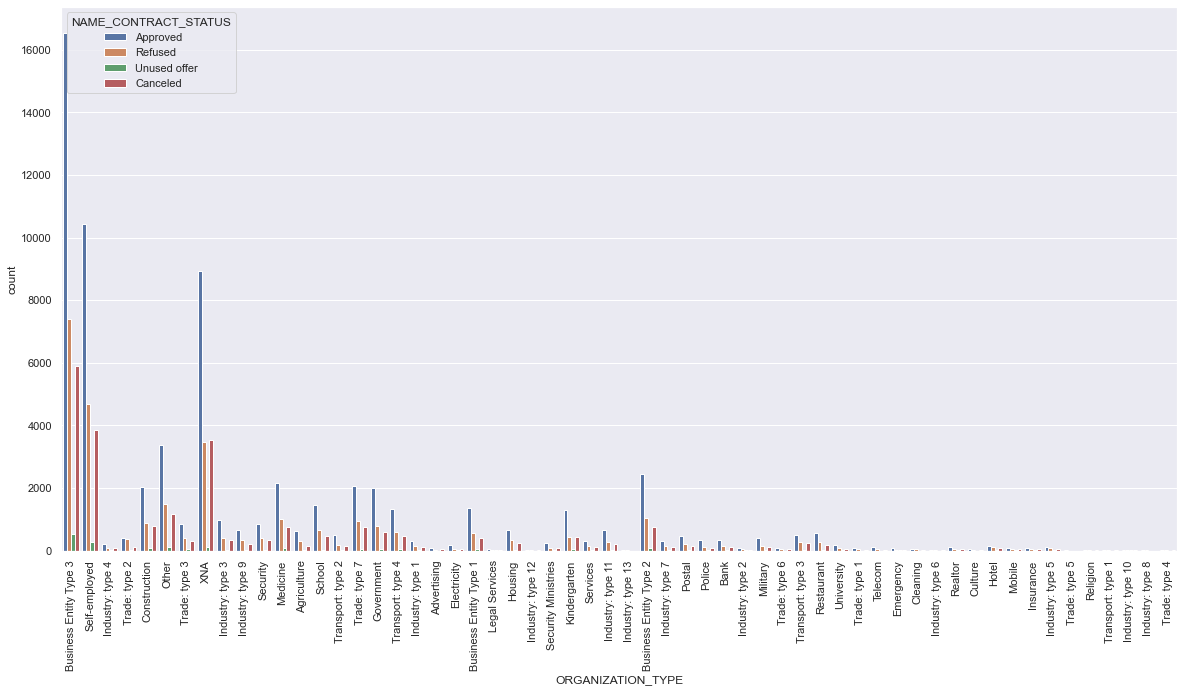

In [109]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=ptree_1)
plt.xticks(rotation=90)
plt.show()

The univariate analysis of this dataset was more fruitful than bivariate analysis.

Bussiness Entity Type 3 and Self-employed tends to be the maxiumum defaulter